# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out 
suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

I found these links to be quite helpful for this project.

Solution for this project. A few bugs but quite useful.
https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb

Another solution for this project. 
https://becominghuman.ai/updated-my-99-40-solution-to-udacity-nanodegree-project-p2-traffic-sign-classification-5580ae5bd51f

Great stuff on image augmentation.
https://github.com/apache/incubator-mxnet/blob/master/python/mxnet/image/image.py

More image processing.
http://www.scipy-lectures.org/advanced/image_processing/

https://navoshta.com/traffic-signs-classification/


---
## Step 0: Load The Data

In [34]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
# pip install opencv-python
import cv2
import glob
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

In [4]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]
n_classes = len(set(y_train))

# How many unique classes/labels there are in the dataset.
# there are 43 classes in y_train, y_test & y_valid
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [11]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

In [12]:
def PlotMultipleImages(nrows, nImages, idx, allImages):
    ncols = int(nImages/nrows)
    #idx = np.random.choice(len(allImages), nImages)
    images = allImages[idx]
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(nrows, np.ceil(nImages/float(nrows)), n+1)
        plt.imshow(image.squeeze())
        a.set_title('Image ' + str(idx[n]))
    fig.set_size_inches(np.array(fig.get_size_inches()) * 2)

#plot_figures(image.squeeze())
    
def PlotMultipleImageHistograms(nrows, nImages, allImages):
    ncols = int(nImages/nrows)
    idx = np.random.choice(len(allImages), nImages)
    images = allImages[idx]
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(nrows, np.ceil(nImages/float(nrows)), n+1)
        plt.hist(image.ravel(), 256, [0,256])
        a.set_title('Image ' + str(idx[n]))
    fig.set_size_inches(np.array(fig.get_size_inches()) * 2)
    
def PlotHistogram(y, n, title):
    hist,bins = np.histogram(y, bins=n)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)
    plt.title('Label distribution for ' + title + ' data', size=18)
    plt.show()


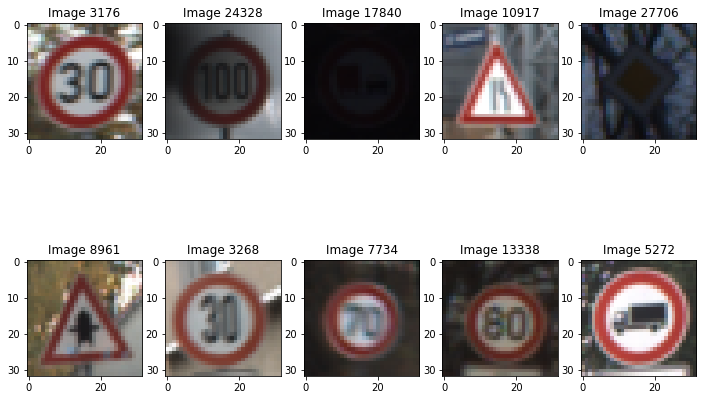

In [13]:

"""
plot a sample of the images
"""
nrows = 2
nImages = 10
idx = np.random.choice(len(X_train), nImages)
PlotMultipleImages(nrows, nImages, idx, X_train)


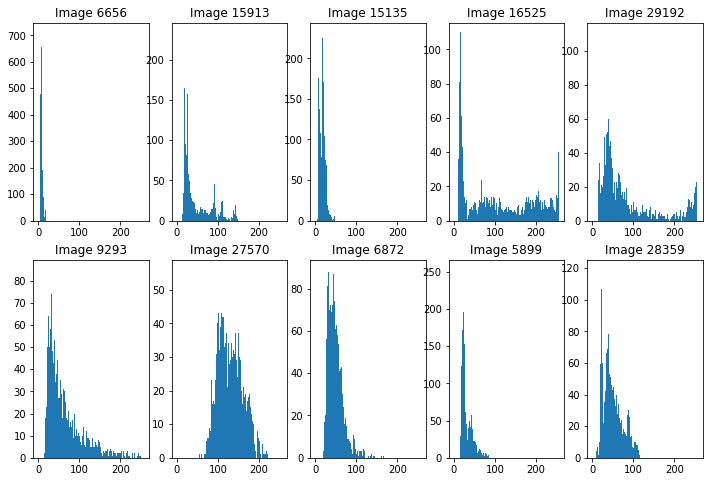

In [14]:
"""
plot some intensity distributions 
"""
PlotMultipleImageHistograms(nrows, nImages, X_train)

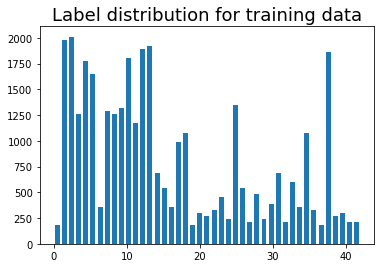

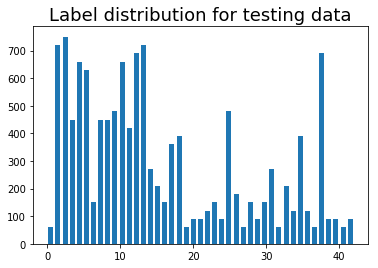

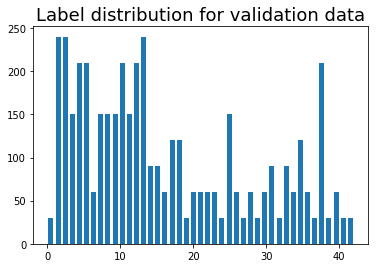

In [15]:
"""
compare label distribution across y_train, y_test, y_valid
want distributions to be similar across all 3 datasets
"""
PlotHistogram(y_train, n_classes, 'training')
PlotHistogram(y_test, n_classes, 'testing')
PlotHistogram(y_valid, n_classes, 'validation')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Note: I tried 3 different ways of converting to gray scale. Then I went with the simplest.


In [16]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# convert to grayscale
# from https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
def rgb2gray(rgb):
    g = np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    g = g[:,:,np.newaxis]
    return g
    #return np.sum(rgb/3, axis=3, keepdims=True)

def ConvertToGrayScale(images):
    #shape = (images.shape[0],images.shape[1],images.shape[2])
    grayImages = np.empty(images.shape)
    for n, image in enumerate(images):
        grayImages[n] = rgb2gray(image)
    return grayImages

# not used
def ConvertToGrayScaleAlt(images):
    grayImages = np.sum(images/3, axis=3, keepdims=True)
    return grayImages

X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)


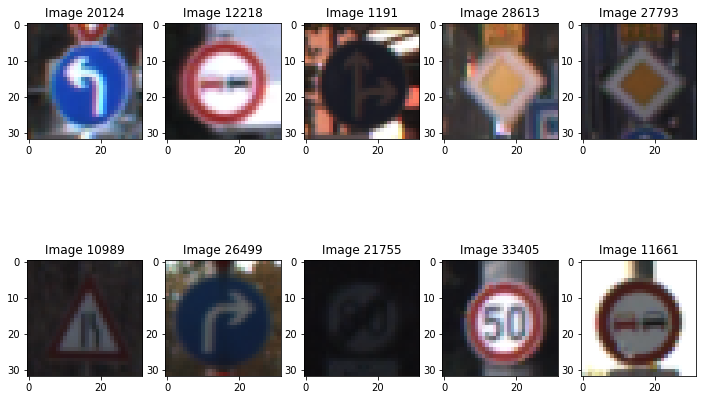

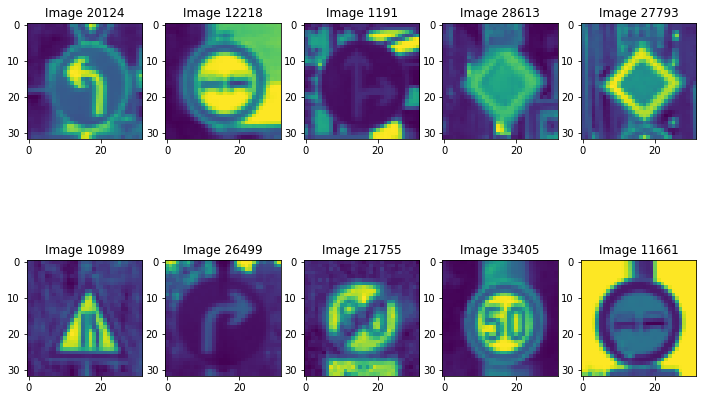

In [17]:
nrows = 2
nImages = 10
idx = np.random.choice(len(X_train), nImages)
PlotMultipleImages(nrows, nImages, idx, X_train)
PlotMultipleImages(nrows, nImages, idx, X_train_gray)

In [18]:
X_train = X_train_gray
X_test = X_test_gray
X_valid = X_valid_gray

This link explained why normalizing is a good thing to do. I ended up normalizing by z-score because it seemed to make sense. I didn't compare results with and without normalizing, but I will next time.


https://www.researchgate.net/post/If_I_used_data_normalization_x-meanx_stdx_for_training_data_would_I_use_train_Mean_and_Standard_Deviation_to_normalize_test_data

Normalize data by substracting the mean of the entire data set. This serves
to center the images. 

Can try normalizing by the stdev too.


This is done so that each image has a similar range so that gradients computed
for back prop have a similar range. Deep learning methods typically share
many parameters and we want these shared params to be sort of uniform.

Should use train data mean and stdev for test if test data does not vary
much from the training data. If the 2 sets differ significantly, may want
to use mean and stdev of test set to normalize test set.

The distributions of classes (as shown above) indicates that the classes are
reasonably well distributed across the sets.


8.212440852174224e-16
-0.00801591142292235
0.013313756369450267


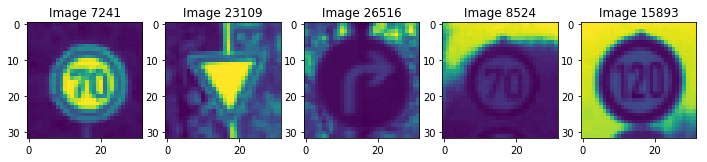

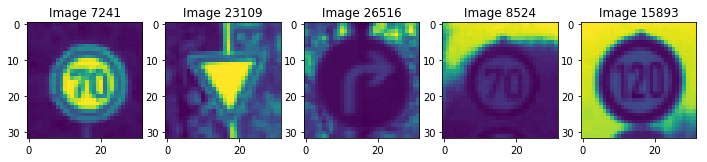

In [19]:
Xmean = np.mean(X_train)
Xstdv = np.std(X_train)

XnormTrain = (X_train - Xmean)/Xstdv
XnormTest  = (X_test  - Xmean)/Xstdv
XnormValid = (X_valid - Xmean)/Xstdv

print(np.mean(XnormTrain))
print(np.mean(XnormTest))
print(np.mean(XnormValid))

nrows = 1
nImages = 5
idx = np.random.choice(len(X_train), nImages)
# plot unnormalized images
PlotMultipleImages(nrows, nImages, idx, X_train)
# and the same image normalized
PlotMultipleImages(nrows, nImages, idx, XnormTrain)

X_train = XnormTrain
X_test = XnormTest
X_valid = XnormValid

image augmentation

Lots of info on the internet about image augmentation being the key to success.

mxnet (referenced at the beginning of this notebook) has some great image augmentation code

My method was to select a random subset of images from the training set
and modify them in semi-random ways, e.g.
   - translate
   - scale up and then crop back to 32x32
   - warp 
   - modify brightness
   - etc.
   
and then add the modified images back to training set - including y_train
   

In [20]:
# these are the functions I wrote to do this:


def TranslateImage(img):
    # somewhat randomly translate image
    rows, cols, _ = img.shape
    px = 6
    dx, dy = np.random.randint(-px, px, 2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img, M, (cols, rows))
    dst = dst[:, :, np.newaxis]
    return dst

def ScaleImage(img):
    # somewhat randomly translate image
    rows, cols, _ = img.shape
    # transform limits
    px = np.random.randint(-6,6)
    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(rows,cols))
    dst = dst[:,:,np.newaxis]
    return dst

def WarpImage(img):
    # somewhat randomly translate image
    rows, cols, _ = img.shape
    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.2   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.2
    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4
    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))    
    dst = dst[:,:, np.newaxis]
    return dst

def BrightnessImage(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

def ContrastImage(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst


def CreateNewSetOfImages(images,method):
    #shape = (images.shape[0],images.shape[1],images.shape[2])
    newImages = np.empty(images.shape)
    if method == 'translate':
        for n, image in enumerate(images):
            newImages[n] = TranslateImage(image)
    elif method == 'scale':
        for n, image in enumerate(images):
            newImages[n] = ScaleImage(image)
    elif method == 'warp':
        for n, image in enumerate(images):
            newImages[n] = WarpImage(image)
    elif method == 'brightness':
        for n, image in enumerate(images):
            newImages[n] = BrightnessImage(image)
    return newImages


In [21]:
# generate new augmented training data
X_train_aug = X_train
y_train_aug = y_train

# randomly select 1/5th of the training set 
nAugment = int(len(X_train)/5)

(6959, 32, 32, 1)
translated


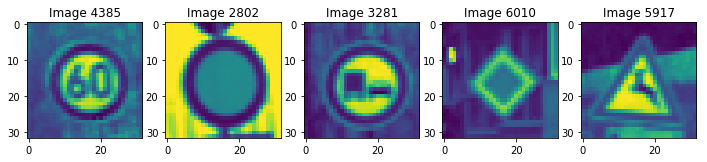

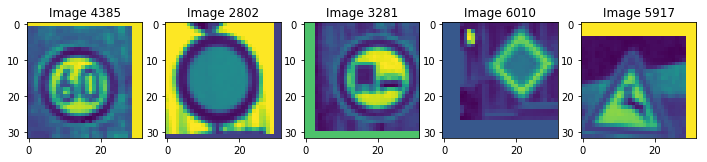

In [22]:
"""
translate those images and append them to the augmented data sets
"""

idx = np.random.choice(len(X_train_aug), nAugment)
xaug = X_train_aug[idx,:]
yaug = y_train_aug[idx]
xaugTran = CreateNewSetOfImages(xaug, 'translate')

print(xaug.shape)

X_train_aug = np.concatenate((X_train_aug, xaugTran), axis=0)
y_train_aug = np.concatenate((y_train_aug, yaug), axis=0)

nrows = 1
n = 5
idx = np.random.choice(len(xaug), n)
PlotMultipleImages(nrows, n, idx, xaug)
print('translated')
PlotMultipleImages(nrows, n, idx, xaugTran)

scaled


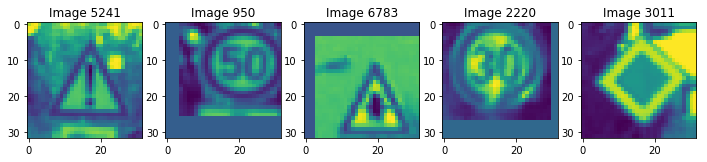

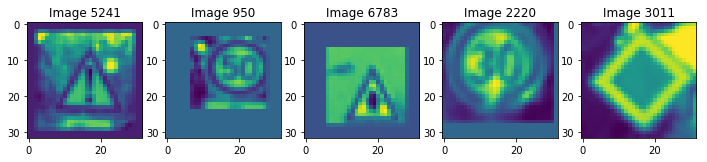

In [23]:
"""
scale images
"""
idx = np.random.choice(len(X_train_aug), nAugment)
xaug = X_train_aug[idx,:]
yaug = y_train_aug[idx]
xaugTran = CreateNewSetOfImages(xaug, 'scale')

X_train_aug = np.concatenate((X_train_aug, xaugTran), axis=0)
y_train_aug = np.concatenate((y_train_aug, yaug), axis=0)

nrows = 1
n = 5
idx = np.random.choice(len(xaug), n)
PlotMultipleImages(nrows, n, idx, xaug)
print('scaled')
PlotMultipleImages(nrows, n, idx, xaugTran)


warp


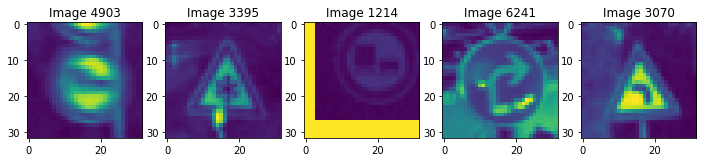

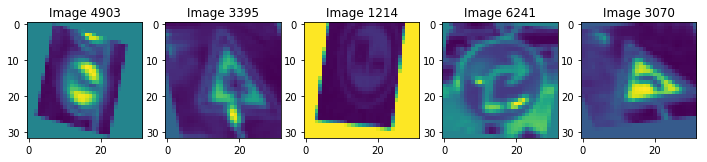

In [24]:
"""
warp images
"""
idx = np.random.choice(len(X_train_aug), nAugment)
xaug = X_train_aug[idx,:]
yaug = y_train_aug[idx]
xaugTran = CreateNewSetOfImages(xaug, 'warp')

X_train_aug = np.concatenate((X_train_aug, xaugTran), axis=0)
y_train_aug = np.concatenate((y_train_aug, yaug), axis=0)

nrows = 1
n = 5
idx = np.random.choice(len(xaug), n)
PlotMultipleImages(nrows, n, idx, xaug)
print('warp')
PlotMultipleImages(nrows, n, idx, xaugTran)



brighness


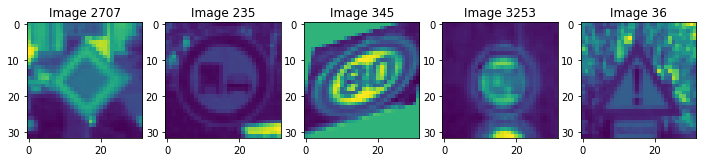

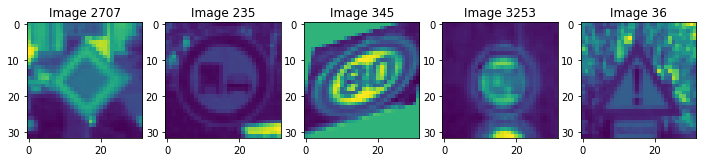

In [25]:
"""
brightness
"""
idx = np.random.choice(len(X_train_aug), nAugment)
xaug = X_train_aug[idx,:]
yaug = y_train_aug[idx]
xaugTran = CreateNewSetOfImages(xaug, 'brightness')

X_train_aug = np.concatenate((X_train_aug, xaugTran), axis=0)
y_train_aug = np.concatenate((y_train_aug, yaug), axis=0)

nrows = 1
n = 5
idx = np.random.choice(len(xaug), n)
PlotMultipleImages(nrows, n, idx, xaug)
print('brighness')
PlotMultipleImages(nrows, n, idx, xaugTran)


In [26]:
print('Now have',len(X_train_aug), 'training image')
print('Now have',len(y_train_aug), 'training labels')

X_train = X_train_aug
y_train = y_train_aug

Now have 62635 training image
Now have 62635 training labels


### Model Architecture

I used LeNet function we wrote previously in this class and a modified version of it. My modified version wasn't much better, but it was good practice for learning how it all works.

In [27]:
def LeNetORIG(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits


In [28]:
def LeNet2(x):    
    # Hyperparameters
    # I tried a bunch of variations on these params, but nothing worked significantly better
    # and many variations worked much worse. :)
    mu = 0.0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    x = tf.concat([xflat, layer2flat], 1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    #################
    #################
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Layer 5: Fully Connected. Input = 0. Output = 84.
    W5 = tf.Variable(tf.truncated_normal(shape=(800, 32), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(32)) 
    x = tf.add(tf.matmul(x, W5), b5)
    
    return logits


In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)
Training...

EPOCH 1 ...
Test Accuracy = 0.881

EPOCH 2 ...
Test Accuracy = 0.918

EPOCH 3 ...
Test Accuracy = 0.928

EPOCH 4 ...
Test Accuracy = 0.933

EPOCH 5 ...
Test Accuracy = 0.928

EPOCH 6 ...
Test Accuracy = 0.937

EPOCH 7 ...
Test Accuracy = 0.934

EPOCH 8 ...
Test Accuracy = 0.938

EPOCH 9 ...
Test Accuracy = 0.927

EPOCH 10 ...
Test Accuracy = 0.927

EPOCH 11 ...
Test Accuracy = 0.929

EPOCH 12 ...
Test Accuracy = 0.929

EPOCH 13 ...
Test Accuracy = 0.922

EPOCH 14 ...
Test Accuracy = 0.941

EPOCH 15 ...
Test Accuracy = 0.935

EPOCH 16 ...
Test Accuracy = 0.934

EPOCH 17 ...
Test Accuracy = 0.940

EPOCH 18 ...
Test Accuracy = 0.935

EPOCH 19 ...
Test Accuracy = 0.929

EPOCH 20 ...
Test Accuracy = 0.937

EPOCH 21 ...
Test Accuracy = 0.934

EPOCH 22 ...
Test Accuracy = 0.933

EPOCH 23 ...
Test Accuracy = 0.938

EPOCH 24 ...
Test Accuracy = 0.925

EPOCH 25 ...
Test Accuracy = 0.936


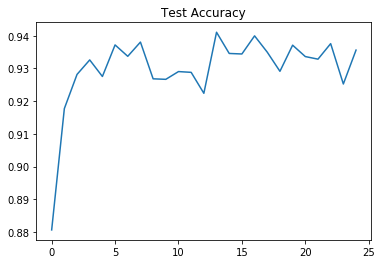

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, n_classes)

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

EPOCHS = 25
BATCH_SIZE = 48

rate = 0.0009

logits = LeNet2(x)
#logits = LeNetORIG(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_aug)
    
    print("Training...")
    print()
    testAccuracyPlot = []
    for i in range(EPOCHS):
        # shuffle because we're using small batches
        X_train, y_train = shuffle(X_train_aug, y_train_aug)
        #X_train, y_train = X_train_aug, y_train_aug
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        testAccuracy = evaluate(X_test, y_test)
        testAccuracyPlot.append(testAccuracy)
        print("EPOCH {} ...".format(i+1))
        print("Test Accuracy = {:.3f}".format(testAccuracy))
        print()
        if i+1 == EPOCHS: 
            validationAccuracy = evaluate(X_valid, y_valid)
            print("Validation Accuracy = {:.3f}".format(validationAccuracy))
    saver.save(sess, 'c:\\Data\\lenet')
    print("Model saved")

plt.plot(testAccuracyPlot)
plt.title("Test Accuracy")
plt.show()


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [32]:
def PlotImages(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12, 14))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()


In [35]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# I selected some signs that weren't in the original data 
# set and denote them as -1

signnames = pd.read_csv('signnames.csv')

myImages = sorted(glob.glob('./images/*.jpg'))
myLabels = np.array([32,3,-1,-1,-1,-1,18,41,9])


(9, 32, 32, 3)

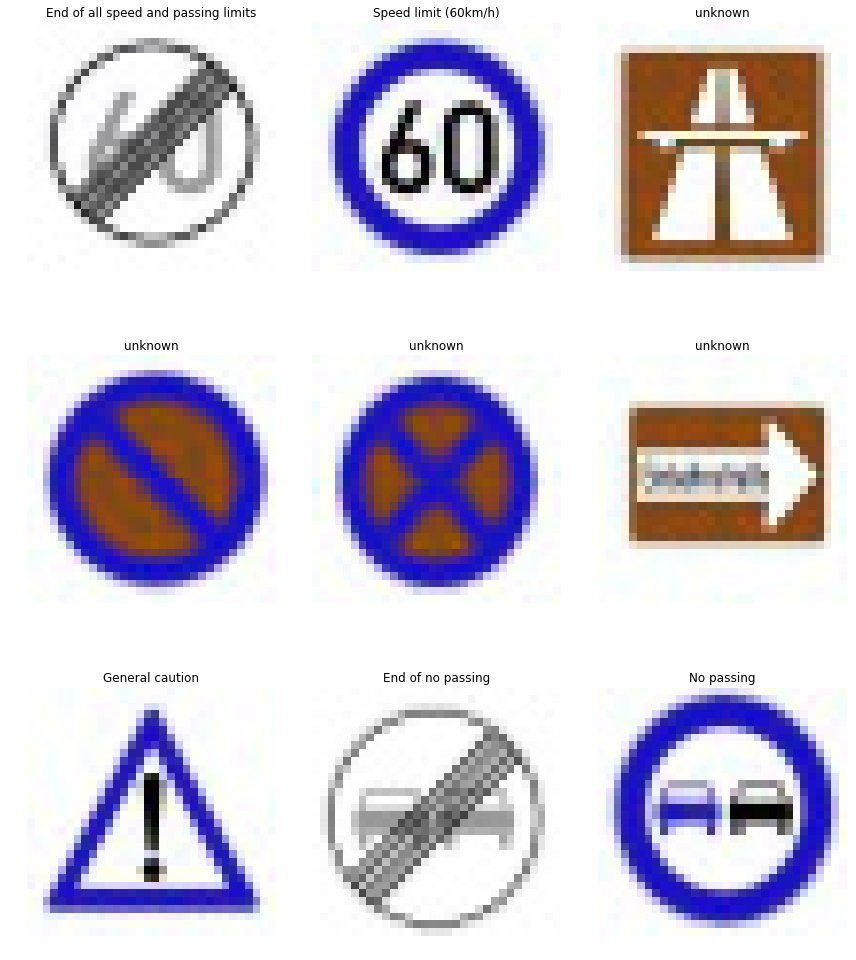

In [36]:

figures = {}
labels = {}
mySigns = []
index = 0
for image in myImages:
    img = cv2.imread(image)
    mySigns.append(img)
    figures[index] = img
    if myLabels[index] != -1:
        labels[index] = signnames.iloc[myLabels[index]][1]
    else:
        labels[index] = 'unknown'
    index += 1

PlotImages(figures, 3, 3, labels)

np.array(mySigns).shape

### Predict the Sign Type for Each Image

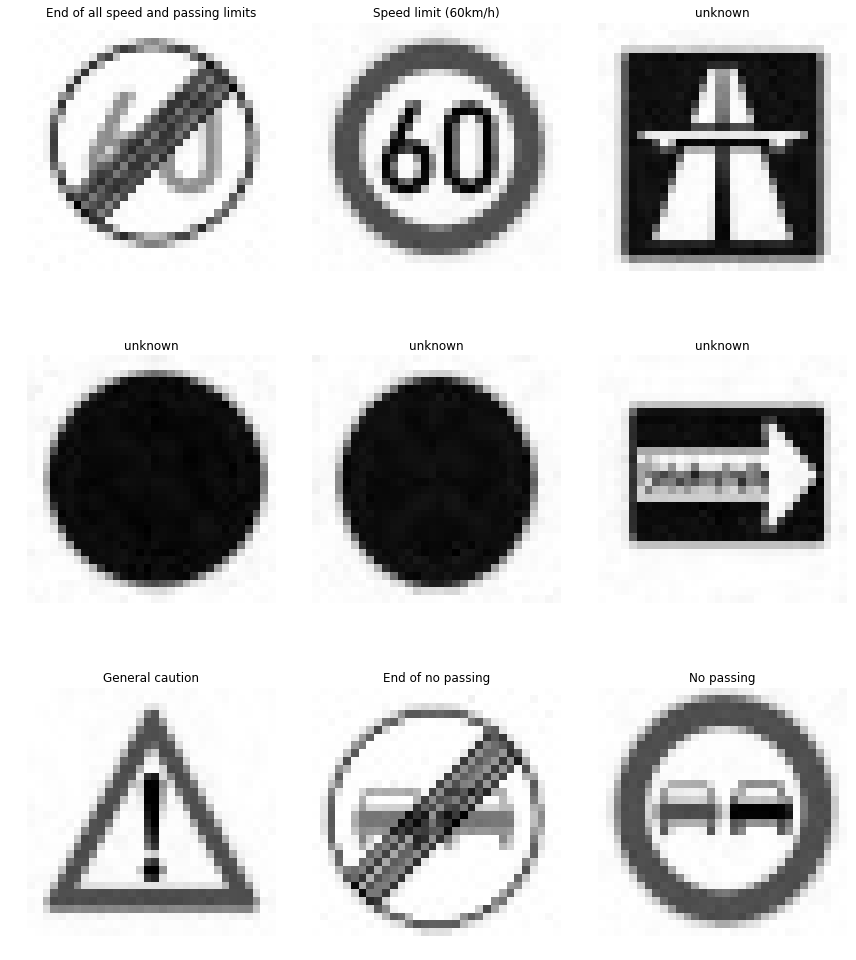

In [37]:
"""
make them gray and normalize them
"""

mySigns = np.array(mySigns)
mySigns_gray = np.sum(mySigns/3, axis=3, keepdims=True)
mySignNormalized = mySigns_gray/127.5-1

number_to_stop = 6
figures = {}
labels = {}
for i in range(len(myImages)):
    if myLabels[i] != -1:
        labels[i] = signnames.iloc[myLabels[i]][1]
    else:
        labels[i] = 'unknown'
    figures[i] = mySigns_gray[i].squeeze()
    
PlotImages(figures, 3, 3, labels)


In [38]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, 'c:\\Data\\lenet')
    myAccuracy = evaluate(mySignNormalized, myLabels)
    print("My Data Set Accuracy = {:.3f}".format(myAccuracy))

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
oneImage = []
oneLabel = []

for i in range(len(myImages)):
    oneImage.append(mySignNormalized[i])
    oneLabel.append(myLabels[i])

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver.save(sess, 'c:\\Data\\lenet')
        myAccuracy = evaluate(oneImage, oneLabel)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(myAccuracy))
        print()


My Data Set Accuracy = 0.111
Image 1
Image Accuracy = 0.000

Image 2
Image Accuracy = 0.000

Image 3
Image Accuracy = 0.000

Image 4
Image Accuracy = 0.250

Image 5
Image Accuracy = 0.000

Image 6
Image Accuracy = 0.000

Image 7
Image Accuracy = 0.000

Image 8
Image Accuracy = 0.000

Image 9
Image Accuracy = 0.000



### Analyze Performance

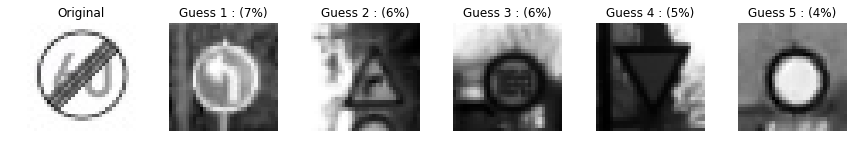

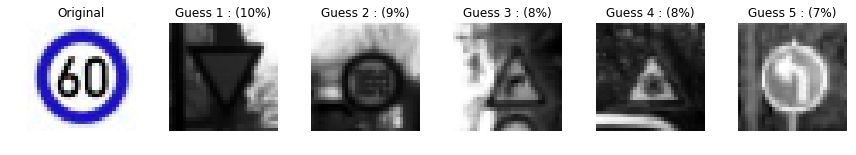

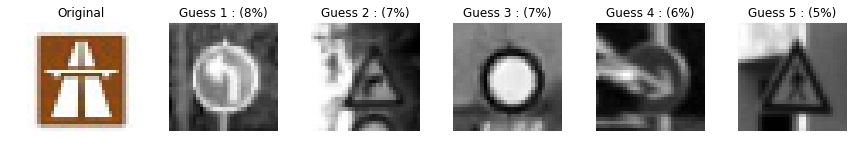

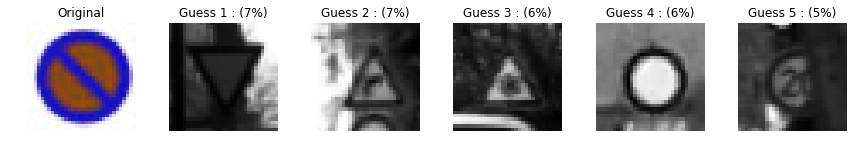

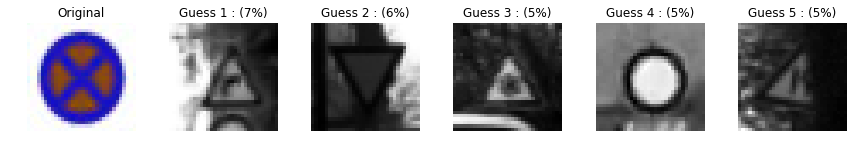

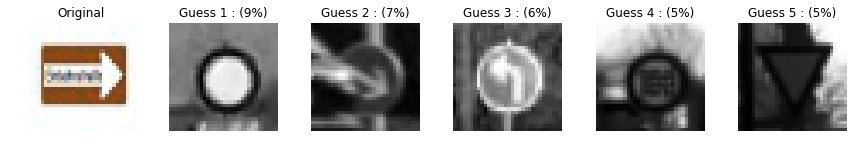

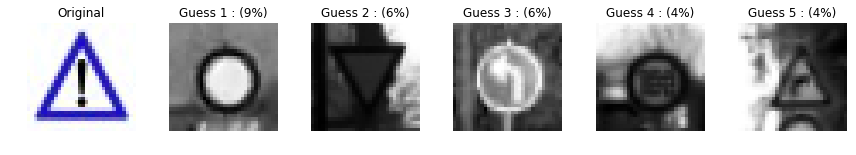

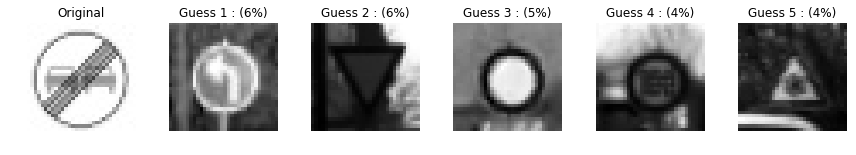

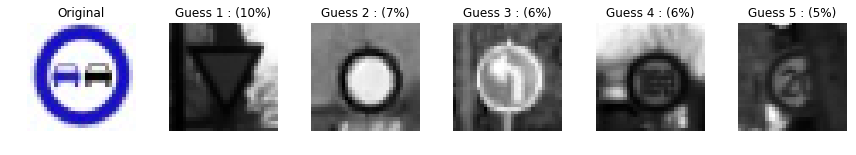

In [41]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

n = len(myImages)
softmax_logits = tf.nn.softmax(logits)
top5 = tf.nn.top_k(softmax_logits, k=n)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.save(sess, 'c:\\Data\\lenet')
    myLogits = sess.run(softmax_logits, feed_dict={x: mySignNormalized, keep_prob: 1.0})
    myBestGuesses = sess.run(top5, feed_dict={x: mySignNormalized, keep_prob: 1.0})

    for i in range(0,n):
        figures = {}
        labels = {}
        
        figures[0] = mySigns[i]
        labels[0] = "Original"
        
        for j in range(5):
            labels[j+1] = 'Guess {} : ({:.0f}%)'.format(j+1, 100*myBestGuesses[0][i][j])
            figures[j+1] = X_valid[np.argwhere(y_valid == myBestGuesses[1][i][j])[0]].squeeze()
            
        PlotImages(figures, 1, 6, labels)


As you can see my predictions were really bad. Of course, 4 of my signs weren't in the classifications, so getting those wrong is understandable. I wonder if I didn't get the others right because I used cartoons instead of actual photographs of signs. I'm out of time/energy, but I'll come back to this later.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")